# Chapter 4 - Training models
This notebook is part of my self-learning of machine learning, following the text "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow 2nd Edition" by Aurelien Geron. In this notebook, I'm working through part of Chapter 4 on training various regression models and the exercises afterwards.

# Linear Regression
First we generate data along a line with some random noise. We will then go through various approaches to build a linear regression model.

noisy line with slope: 2 and y-intercept: 5


<function matplotlib.pyplot.show(close=None, block=None)>

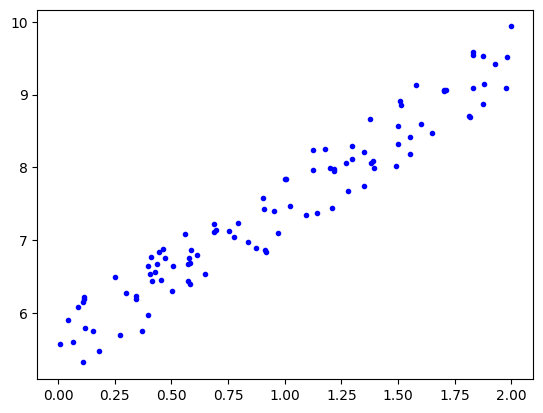

In [23]:
import numpy as np
import matplotlib.pyplot as plt

y_int = 5 
slope = 2 
print(f"noisy line with slope: " + str(slope) + " and y-intercept: " + str(y_int))

X = 2 * np.random.rand(100, 1)
y = slope * X + y_int + np.random.rand(100, 1)

plt.figure()
plt.plot(X, y, 'b.')
plt.show

First, we can compute the line of best fit directly from the normal equation. We have to add in X_0 = 1, and then compute (X^T X)^-1 X^T y

In [24]:
X_full = np.c_[np.ones((100, 1)), X]
best_line = np.linalg.inv(X_full.T.dot(X_full)).dot(X_full.T).dot(y)   
best_line

array([[5.61897202],
       [1.90756564]])

Now we have the best parameters, and we can use these to make new predictions.

In [25]:
X_new = np.array([[0], [2]])
X_new_full = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_full.dot(best_line)
y_predict

array([[5.61897202],
       [9.4341033 ]])

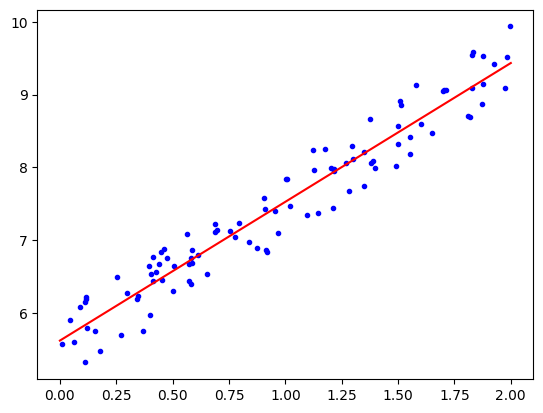

In [26]:
plt.figure()
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r-')
plt.show()

Computing the regression via the normal equation is a direct, closed-form solution that doesn't require any hyperparameters, making it quite desirable. Its main drawback is speed as computing the matrix inverse scales poorly with the matrix size. Here that was not an issue as there were only I've seen guides that say if we are working with >10,000 features it is generally prohibitively slow.

When this is the case, we have other ways to solve for the linear regression model using machine learning techniques. We start with the basic linear regression from scikit-learn:

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([5.61897202]), array([[1.90756564]]))

In [28]:
lin_reg.predict(X_new)

array([[5.61897202],
       [9.4341033 ]])

The LinearRegression class fits the model in about O(n^2) time, where n is the number of features, which is better than solving the normal equation, but still too slow in practice for particularly large datasets. One method which is faster yet is 

## Gradient Descent